In [1]:
%matplotlib inline

In [2]:
#
# We need a regression model for predicting PDR (highest priority): 
# Variables are: 
#   - Number of unique CpGs per cell
#   - Median Average Read CpG per cell (or mean if normally distributed)
#   - BS rate per cell
#   - CLL or Normal status per cell
# What is the coefficient and the P value for each variable for a model predicting PDR?

In [3]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
pd.set_option('display.max_columns', 50) # print all rows


import os
os.chdir('/Users/evanbiederstedt/Downloads/RRBS_data_files')

In [4]:
normal_cellA_df = pd.read_csv("unweighted_PDR_methyl_RRBS_normal_B.csv")
normal_cellB_df = pd.read_csv("unweighted_PDR_methyl_CD27pcell.csv") 
normal_cellC_df = pd.read_csv("unweighted_PDR_methyl_CD27mcell.csv")
cll_cellA_df = pd.read_csv("unweighted_PDR_methyl_RRBS_cw154.csv")
cll_cellC_df = pd.read_csv("unweighted_PDR_methyl_RRBS_trito_pool.csv")

In [5]:
normal_cellA_df = normal_cellA_df.drop(["Unnamed: 0"], axis=1)  
normal_cellA_df["type"] = str('normal')
normal_cellA_df["bio"] = str('normal_B')
normal_cellA_df["protocol"] = normal_cellA_df["filename"].str[5:24]
normal_cellA_df["filename"] = normal_cellA_df["filename"].str[:40]

In [6]:
cpg1 = pd.read_csv('Meth_PDR_cell_RRBS_normal_B1_CpGs.csv')
cpg1 = cpg1.drop(["Unnamed: 0"], axis=1)  
cpg1["filename"] = cpg1["filename"].str[:40]
normal_cellA_df = pd.merge(normal_cellA_df, cpg1, how='inner')
normal_cellB_df["type"] = str('normal')
normal_cellB_df = normal_cellB_df.drop(["Unnamed: 0"], axis=1) 
normal_cellB_df["bio"] = str('CD27p')
normal_cellB_df["protocol"] = normal_cellB_df["filename"].str[5:31]
normal_cellB_df["filename"] = normal_cellB_df["filename"].str[:50]
normal_cellB_df["filename"] = normal_cellB_df["filename"].str.replace(r'.dan$', '')
normal_cellB_df["filename"] = normal_cellB_df["filename"].str.replace(r'.da$', '')
cpg2 = pd.read_csv('NormalBCD19pCD27pcell_CpGs.csv')
cpg2 = cpg2.drop(["Unnamed: 0"], axis=1)  
cpg2["filename"] = cpg2["filename"].str[:50]
cpg2["filename"] = cpg2["filename"].str.replace(r'.dan$', '')
cpg2["filename"] = cpg2["filename"].str.replace(r'.da$', '')
normal_cellB_df = pd.merge(normal_cellB_df, cpg2, how='inner')
normal_cellC_df = normal_cellC_df.drop(["Unnamed: 0"], axis=1)  
normal_cellC_df["type"] = str('normal')
normal_cellC_df["protocol"] = normal_cellC_df["filename"].str[5:31]
normal_cellC_df["bio"] = str('CD27m')
normal_cellC_df["filename"] = normal_cellC_df["filename"].str[:50]
normal_cellC_df["filename"] = normal_cellC_df["filename"].str.replace(r'.dan$', '')
normal_cellC_df["filename"] = normal_cellC_df["filename"].str.replace(r'.da$', '')
cpg3 = pd.read_csv("NormalBCD19pCD27mcell_CpGs.csv")
cpg3 = cpg3.drop(["Unnamed: 0"], axis=1)  
cpg3["filename"] = cpg3["filename"].str[:50]
cpg3["filename"] = cpg3["filename"].str.replace(r'.dan$', '')
cpg3["filename"] = cpg3["filename"].str.replace(r'.da$', '')
normal_cellC_df = pd.merge(normal_cellC_df, cpg3, how='inner')
frames3 = [normal_cellA_df, normal_cellB_df, normal_cellC_df]
normal_result = pd.concat(frames3)
print(normal_result.shape)
print(normal_result.columns)

(304, 9)
Index(['PDR_unweighted', 'avgReadCpGs_mean', 'avgReadCpGs_median', 'bio',
       'filename', 'methylation_unweighted', 'protocol', 'total_reads',
       'type'],
      dtype='object')


In [7]:
normal_result = normal_result[['filename', 'PDR_unweighted', 'total_reads', 'type', 'bio', 'protocol', 'avgReadCpGs_mean', 'avgReadCpGs_median']]

In [8]:
cll_cellA_df = cll_cellA_df.drop(["Unnamed: 0"], axis=1) 
cll_cellA_df["type"] = str('CLL')
cll_cellA_df["protocol"] = cll_cellA_df["filename"].str[5:34]
cll_cellA_df["protocol"][cll_cellA_df["protocol"] == 'cw154_CutSmart_proteinase_K_T'] = 'cw154_CutSmart_proteinase_K'
cll_cellA_df["protocol"][cll_cellA_df["protocol"] == 'cw154_Tris_protease_GR_CAGAGA'] = 'cw154_Tris_protease_GR'
cll_cellA_df["protocol"][(cll_cellA_df["protocol"] != 
        'cw154_Tris_protease_GR') & (cll_cellA_df["protocol"] != 'cw154_CutSmart_proteinase_K')] = 'cw154_Tris_protease'
cll_cellA_df["bio"] = str('CLL')
cll_cellA_df["filename"] = cll_cellA_df["filename"].str[:51]
cll_cellA_df["filename"] = cll_cellA_df["filename"].str.replace(r'.da$', '')
cll_cellA_df["filename"] = cll_cellA_df["filename"].str.replace(r'.annoRR$', '')
cll_cellA_df["filename"] = cll_cellA_df["filename"].str.replace(r'.ann$', '')
cll_cellA_df["filename"] = cll_cellA_df["filename"].str.replace(r'.dan$', '')
cpg4 = pd.read_csv('CLL_RRBS_cw154_A_CpGs.csv')
cpg4 = cpg4.drop(["Unnamed: 0"], axis=1)  
cpg4["filename"] = cpg4["filename"].str[:51]
cpg4["filename"] = cpg4["filename"].str.replace(r'.da$', '')
cpg4["filename"] = cpg4["filename"].str.replace(r'.annoRR$', '')
cpg4["filename"] = cpg4["filename"].str.replace(r'.ann$', '')
cpg4["filename"] = cpg4["filename"].str.replace(r'.dan$', '')
cll_cellA_df = pd.merge(cll_cellA_df, cpg4, how='inner')
cll_cellC_df = cll_cellC_df.drop(["Unnamed: 0"], axis=1) 
cll_cellC_df["type"] = str('CLL')
cll_cellC_df["bio"] = str('CLL')
cll_cellC_df["protocol"] = cll_cellC_df["filename"].str[5:17]
cll_cellC_df["filename"] = cll_cellC_df["filename"].str[:33]
cpg5 = pd.read_csv('Meth_PDR_cell_RRBS_trito_pool_CpGs.csv')
cpg5 = cpg5.drop(["Unnamed: 0"], axis=1) 
cpg5["filename"] = cpg5["filename"].str[:33]
cll_cellC_df = pd.merge(cll_cellC_df, cpg5, how='inner')
frames2 = [cll_cellA_df, cll_cellC_df]
cll_result = pd.concat(frames2)
print(cll_result.shape)
print(cll_result.columns)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(110, 9)
Index(['PDR_unweighted', 'avgReadCpGs_mean', 'avgReadCpGs_median', 'bio',
       'filename', 'methylation_unweighted', 'protocol', 'total_reads',
       'type'],
      dtype='object')


In [9]:
cll_result = cll_result[['filename', 'PDR_unweighted', 'total_reads', 'type', 'bio', 'protocol', 'avgReadCpGs_mean', 'avgReadCpGs_median']]
cll_result = cll_result.reset_index(drop=True)
normal_result = normal_result.reset_index(drop=True)
combined2 = normal_result.append(cll_result)
combined2 = combined2.reset_index(drop=True)
combined2.head()

,filename,PDR_unweighted,total_reads,type,bio,protocol,avgReadCpGs_mean,avgReadCpGs_median
0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACAACC,0.254835,11894660.0,normal,normal_B,normal_B_cell_A1_24,5.295301,4.0
1,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACCGCG,0.390562,3744659.0,normal,normal_B,normal_B_cell_A1_24,5.285714,4.0
2,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACGTGG,0.266418,10461874.0,normal,normal_B,normal_B_cell_A1_24,5.453122,5.0
3,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,0.265385,14051.0,normal,normal_B,normal_B_cell_A1_24,4.950166,4.0
4,RRBS_normal_B_cell_A1_24_TAAGGCGA.AGGATG,0.240201,21928743.0,normal,normal_B,normal_B_cell_A1_24,5.366276,5.0


In [10]:
bs = pd.read_table('allStats.txt')
bs = bs.drop('sample.1', axis=1)
bs = bs.drop('sample.2', axis=1)
bs = bs.reset_index(drop=True)
bs = bs.drop('class', axis=1)
bs = bs.drop('totMeth', axis=1)
bs = bs.drop('totSeen', axis=1)
bs = bs.drop('avSum', axis=1)
bs = bs.drop('avTot', axis=1)
bs = bs.drop('rMixed', axis=1)
bs = bs.drop('rTot', axis=1)
bs = bs.drop('rAv', axis=1)
bs = bs.drop('rAvTot', axis=1)
bs = bs.drop('bed', axis=1)
bs = bs.drop('methInfoFile', axis=1)
bs = bs.drop('totReads', axis=1)
bs = bs.drop('totAligned', axis=1)
bs = bs.drop('totClipped', axis=1)
bs = bs.drop('totSeenCpG', axis=1)
bs = bs.drop('totUsed', axis=1)
bs = bs.drop('totMethCpG', axis=1)
# bs = bs.drop('totCpG', axis=1)
bs = bs.drop('totalReadPairs', axis=1)
bs = bs.drop('alignedReads', axis=1)
bs = bs.drop('totalReads', axis=1)
bs = bs.rename(columns = {'sample':'filename'})

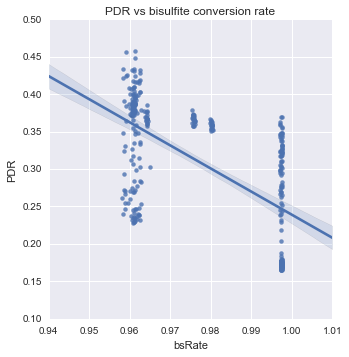

In [11]:
merged = pd.merge(combined2, bs, how='inner')
merged = merged.reset_index(drop=True)
merged = merged.rename(columns = {'PDR_unweighted':'PDR'})
merged = merged.rename(columns = {'totCpG':'Unique_CpGs'})
# Remove all data points with less than 100k in totcpg 
merged = merged[merged['total_reads'] > 100000]
scattermatrix1 = merged.drop(['filename', 'total_reads', 'type', 'protocol', 'avgReadCpGs_median'], axis=1)
sns.lmplot(x="bsRate", y="PDR",  data=scattermatrix1)
plt.title("PDR vs bisulfite conversion rate")

In [12]:
scattermatrix7 = merged.drop(['filename', 'bio', 'avgReadCpGs_median'], axis=1)
y = scattermatrix7.PDR # dependent variable
print(y.shape)
X = scattermatrix7.drop(['PDR', 'total_reads', 'protocol'], axis=1)
print(X.shape)

categorical_variables = ['type']
for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)
    
import statsmodels.api as sm
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for CLL 'RRBS_trito_pool1', predictPDR")
print("Variables: Number of unique CpGs per cell, mean Average Read CpG per cell, BS rate, Cll or Normal B")
est.summary()

(358,)
(358, 4)
Regression results for CLL 'RRBS_trito_pool1', predictPDR
Variables: Number of unique CpGs per cell, mean Average Read CpG per cell, BS rate, Cll or Normal B


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PDR   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     88.54
Date:                Fri, 08 Jul 2016   Prob (F-statistic):           4.93e-52
Time:                        16:04:48   Log-Likelihood:                 502.75
No. Observations:                 358   AIC:                            -995.5
Df Residuals:                     353   BIC:                            -976.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                2.2452      0.160     14.058      0.000         1.931     2.559
avgReadCpGs_mean    -0.1098      0.024     -4.547      0.000        -0.157    -0.062
Unique_CpGs        1.57e-08   1.32e-08      1.186      0.236     -1.03e-08  4.17e-08
bsRate              -2.5205      0.202    -12.457      0.000        -2.918    -2.123
type_CLL             1.1512      0.079     14.555      0.000         0.996     1.307
type_normal          1.0939      0.081     13.539      0.000         0.935     1.253
==============================================================================
Omnibus:                       66.898   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.145
Skew:                           0.158   Prob(JB):                     0.000312
Kurtosis:                       2.009   Cond. No.                     6.18e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.03e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
tritopool = merged[merged["protocol"] == 'trito_pool_1']
tritopool = tritopool.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
tritopoolA = tritopool.set_index("filename")
from itertools import combinations
cc = list(combinations(tritopool.filename,2))
out = pd.DataFrame([tritopoolA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(tritopool.PDR, tritopool.PDR)), tritopool.filename, tritopool.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs = pd.merge(out, pdr_differences, how='inner')
print(pairs.shape)
pairs = pairs.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs.PDR_difference # dependent variable
X = pairs.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
print(y.shape)
print(X.shape)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for CLL 'RRBS_trito_pool1', predict \delta PDR")
est.summary()

(210, 7)
(210,)
(210, 3)
Regression results for CLL 'RRBS_trito_pool1', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.969
Date:                Fri, 08 Jul 2016   Prob (F-statistic):             0.0329
Time:                        16:04:49   Log-Likelihood:                 883.79
No. Observations:                 210   AIC:                            -1760.
Df Residuals:                     206   BIC:                            -1746.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                9.7562      3.485      2.800      0.006         2.886    16.626
avgReadCpGs_mean    -0.0023      0.005     -0.480      0.632        -0.012     0.007
Unique_CpGs_mean  8.497e-09   3.29e-09      2.586      0.010      2.02e-09   1.5e-08
bsRate_mean         -9.9427      3.551     -2.800      0.006       -16.944    -2.941
==============================================================================
Omnibus:                       11.188   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.918
Skew:                           0.564   Prob(JB):                      0.00258
Kurtosis:                       2.700   Cond. No.                     1.72e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


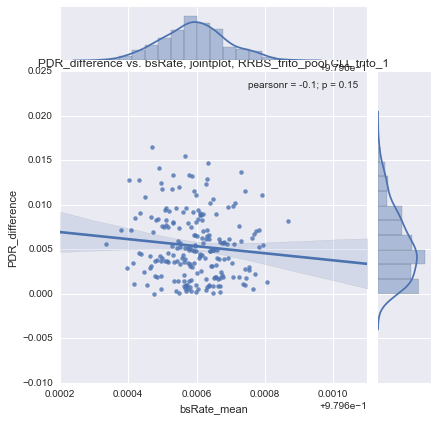

In [14]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, RRBS_trito_pool CLL trito_1")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


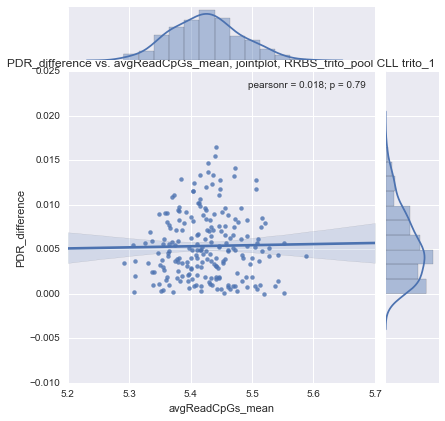

In [15]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, RRBS_trito_pool CLL trito_1")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


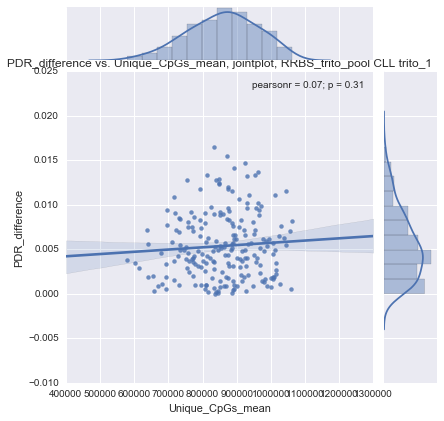

In [16]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, RRBS_trito_pool CLL trito_1")

In [17]:
tritopool2 = merged[merged["protocol"] == 'trito_pool_2']
tritopool2 = tritopool2.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
tritopool2A = tritopool2.set_index("filename")
from itertools import combinations
cc = list(combinations(tritopool2.filename,2))
out = pd.DataFrame([tritopool2A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(tritopool2.PDR, tritopool2.PDR)), tritopool2.filename, tritopool2.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs1a = pd.merge(out, pdr_differences, how='inner')
print(pairs1a.shape)
pairs1a = pairs1a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs1a.PDR_difference # dependent variable
X = pairs1a.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
print(y.shape)
print(X.shape)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for CLL 'RRBS_trito_pool_2', predict \delta PDR")
est.summary()

(253, 7)
(253,)
(253, 3)
Regression results for CLL 'RRBS_trito_pool_2', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     7.207
Date:                Fri, 08 Jul 2016   Prob (F-statistic):           0.000117
Time:                        16:04:52   Log-Likelihood:                 1014.4
No. Observations:                 253   AIC:                            -2021.
Df Residuals:                     249   BIC:                            -2007.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               11.8178      2.713      4.356      0.000         6.474    17.162
avgReadCpGs_mean     0.0174      0.005      3.204      0.002         0.007     0.028
Unique_CpGs_mean  1.039e-09   2.25e-09      0.461      0.645      -3.4e-09  5.48e-09
bsRate_mean        -12.2030      2.794     -4.368      0.000       -17.705    -6.701
==============================================================================
Omnibus:                       10.799   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.510
Skew:                           0.513   Prob(JB):                      0.00317
Kurtosis:                       2.797   Cond. No.                     1.24e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


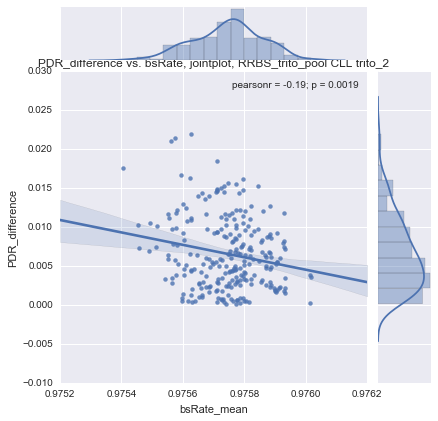

In [18]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs1a, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, RRBS_trito_pool CLL trito_2")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


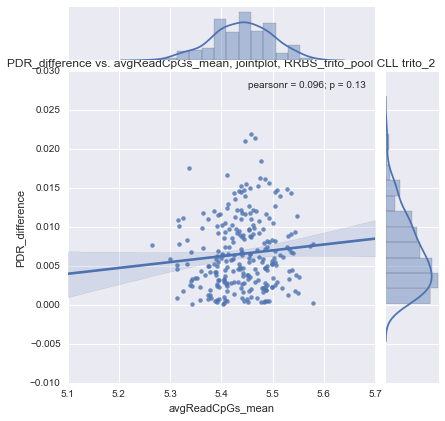

In [19]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs1a, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, RRBS_trito_pool CLL trito_2")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


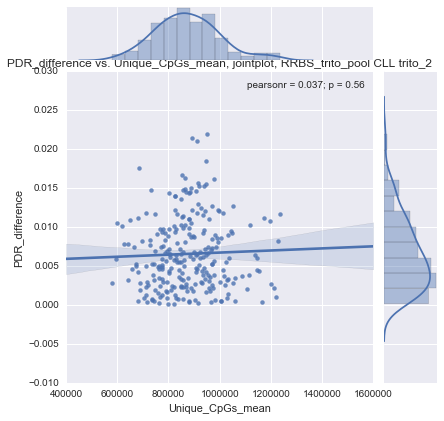

In [20]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs1a, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, RRBS_trito_pool CLL trito_2")

In [21]:
cw154 = merged[merged["protocol"] == 'cw154_Tris_protease']
cw154 = cw154.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
cw154 = cw154.reset_index(drop=True)
cw154A = cw154.set_index("filename")
from itertools import combinations
cc = list(combinations(cw154.filename,2))
out = pd.DataFrame([cw154A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(cw154.PDR, cw154.PDR)), cw154.filename, cw154.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs2 = pd.merge(out, pdr_differences, how='inner')
pairs2 = pairs2.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs2.PDR_difference # dependent variable
X = pairs2.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for CLL 'cw154_Tris_protease', predict \delta PDR")
est.summary()

Regression results for CLL 'cw154_Tris_protease', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.693
Date:                Fri, 08 Jul 2016   Prob (F-statistic):              0.170
Time:                        16:04:55   Log-Likelihood:                 866.30
No. Observations:                 210   AIC:                            -1725.
Df Residuals:                     206   BIC:                            -1711.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               -3.8510      1.770     -2.175      0.031        -7.342    -0.360
avgReadCpGs_mean    -0.0057      0.004     -1.604      0.110        -0.013     0.001
Unique_CpGs_mean -2.353e-09   2.53e-09     -0.931      0.353     -7.33e-09  2.63e-09
bsRate_mean          4.0470      1.853      2.184      0.030         0.394     7.700
==============================================================================
Omnibus:                       14.408   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.824
Skew:                           0.491   Prob(JB):                      0.00271
Kurtosis:                       2.378   Cond. No.                     3.92e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


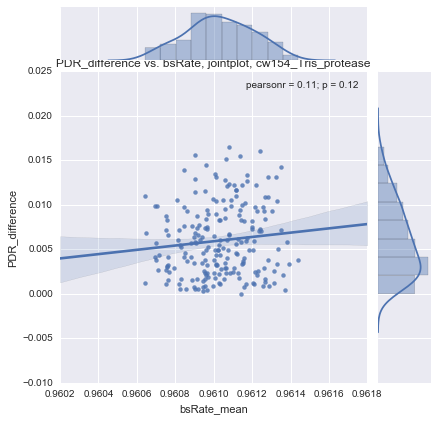

In [22]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs2, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, cw154_Tris_protease")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


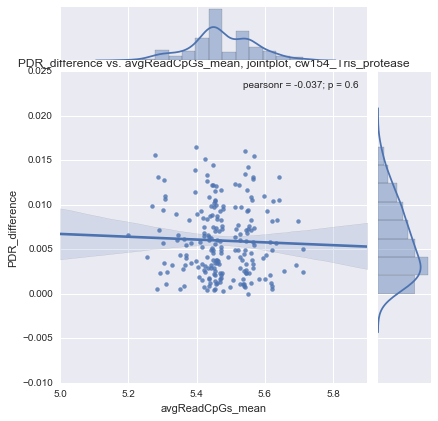

In [23]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs2, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, cw154_Tris_protease")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


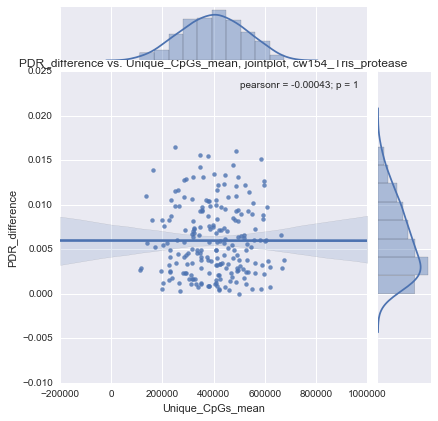

In [24]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs2, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, cw154_Tris_protease")

In [25]:
cw154 = merged[merged["protocol"] == 'cw154_Tris_protease_GR']
cw154 = cw154.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
cw154 = cw154.reset_index(drop=True)
cw154A = cw154.set_index("filename")
from itertools import combinations
cc = list(combinations(cw154.filename,2))
out = pd.DataFrame([cw154A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(cw154.PDR, cw154.PDR)), cw154.filename, cw154.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs2a = pd.merge(out, pdr_differences, how='inner')
pairs2a = pairs2a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs2a.PDR_difference # dependent variable
X = pairs2a.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for CLL 'RRBS_cw154_Tris_protease_GR', predict \delta PDR")
est.summary()

Regression results for CLL 'RRBS_cw154_Tris_protease_GR', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     7.188
Date:                Fri, 08 Jul 2016   Prob (F-statistic):           0.000130
Time:                        16:04:57   Log-Likelihood:                 830.25
No. Observations:                 210   AIC:                            -1652.
Df Residuals:                     206   BIC:                            -1639.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               -7.8946      2.163     -3.650      0.000       -12.159    -3.630
avgReadCpGs_mean     0.0012      0.003      0.337      0.737        -0.006     0.008
Unique_CpGs_mean -4.238e-09   2.46e-09     -1.720      0.087      -9.1e-09   6.2e-10
bsRate_mean          8.2180      2.261      3.634      0.000         3.760    12.676
==============================================================================
Omnibus:                       17.100   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.953
Skew:                           0.723   Prob(JB):                     7.66e-05
Kurtosis:                       3.269   Cond. No.                     5.05e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


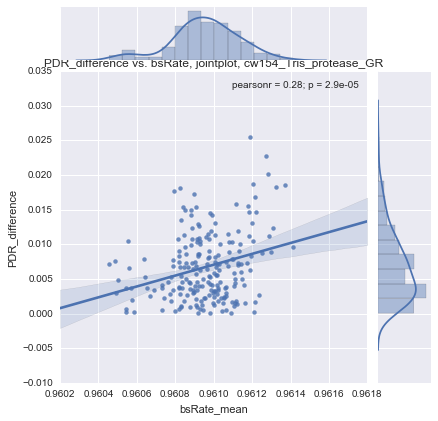

In [26]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs2a, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, cw154_Tris_protease_GR")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


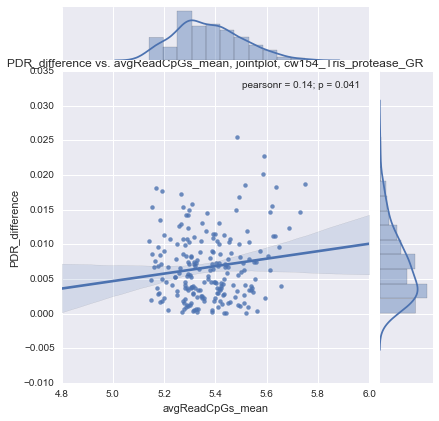

In [27]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs2a, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, cw154_Tris_protease_GR")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


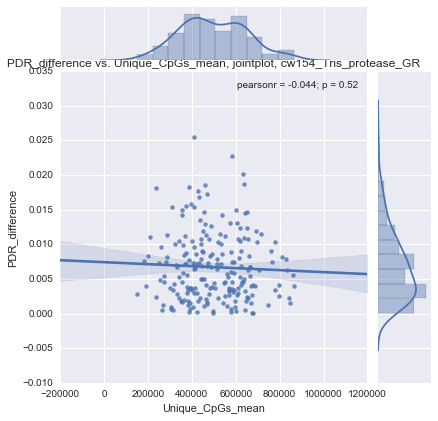

In [28]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs2a, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, cw154_Tris_protease_GR")

In [29]:
# cw154_CutSmart_proteinase_K
cw154 = merged[merged["protocol"] == 'cw154_CutSmart_proteinase_K']
cw154 = cw154.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
cw154 = cw154.reset_index(drop=True)
cw154A = cw154.set_index("filename")
from itertools import combinations
cc = list(combinations(cw154.filename,2))
out = pd.DataFrame([cw154A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(cw154.PDR, cw154.PDR)), cw154.filename, cw154.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs2b = pd.merge(out, pdr_differences, how='inner')
pairs2b = pairs2b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs2b.PDR_difference # dependent variable
X = pairs2b.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for CLL 'cw154_CutSmart_proteinase_K', predict \delta PDR")
est.summary()

Regression results for CLL 'cw154_CutSmart_proteinase_K', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     246.9
Date:                Fri, 08 Jul 2016   Prob (F-statistic):           6.10e-68
Time:                        16:05:01   Log-Likelihood:                 705.34
No. Observations:                 210   AIC:                            -1403.
Df Residuals:                     206   BIC:                            -1389.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const              -56.1216      3.131    -17.925      0.000       -62.294   -49.949
avgReadCpGs_mean    -0.0473      0.013     -3.596      0.000        -0.073    -0.021
Unique_CpGs_mean  -5.93e-08   4.97e-09    -11.920      0.000     -6.91e-08 -4.95e-08
bsRate_mean         58.5189      3.247     18.023      0.000        52.118    64.920
==============================================================================
Omnibus:                        4.936   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.737
Skew:                          -0.278   Prob(JB):                       0.0936
Kurtosis:                       3.481   Cond. No.                     5.01e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


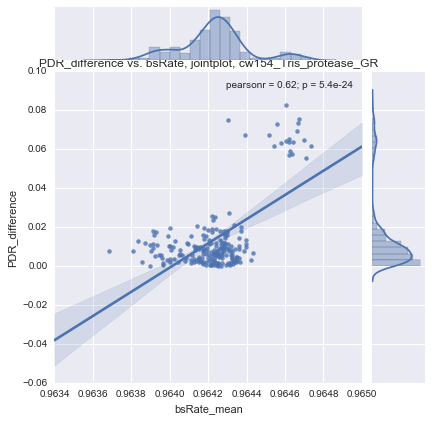

In [30]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs2b, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, cw154_Tris_protease_GR")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


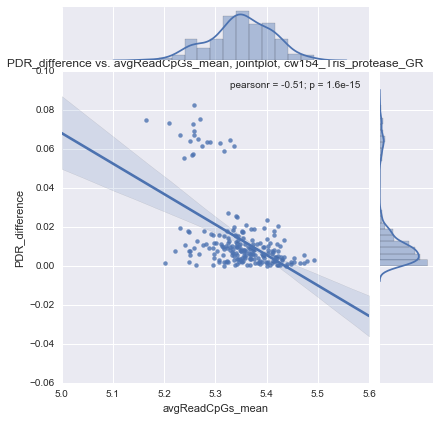

In [31]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs2b, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, cw154_Tris_protease_GR")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


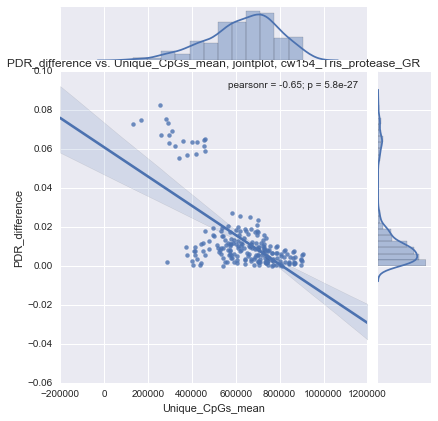

In [32]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs2b, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, cw154_Tris_protease_GR")

In [33]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell1_22_']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.PDR, pcell.PDR)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3 = pd.merge(out, pdr_differences, how='inner')
pairs3 = pairs3.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs3.PDR_difference # dependent variable
X = pairs3.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for Normal B 'NormalBCD19pCD27pcell1_22', predict \delta PDR")
est.summary()

Regression results for Normal B 'NormalBCD19pCD27pcell1_22', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.1431
Date:                Fri, 08 Jul 2016   Prob (F-statistic):              0.934
Time:                        16:05:04   Log-Likelihood:                 270.53
No. Observations:                 153   AIC:                            -533.1
Df Residuals:                     149   BIC:                            -520.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                2.9291     59.000      0.050      0.960      -113.656   119.514
avgReadCpGs_mean    -0.0181      0.056     -0.324      0.746        -0.129     0.092
Unique_CpGs_mean  1.659e-08   4.42e-08      0.375      0.708     -7.08e-08  1.04e-07
bsRate_mean         -2.7874     59.142     -0.047      0.962      -119.652   114.077
==============================================================================
Omnibus:                       12.972   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.614
Skew:                           0.754   Prob(JB):                     0.000671
Kurtosis:                       2.866   Cond. No.                     9.28e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.28e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


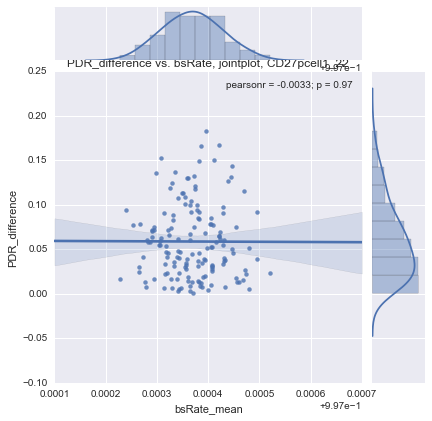

In [34]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs3, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, CD27pcell1_22")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


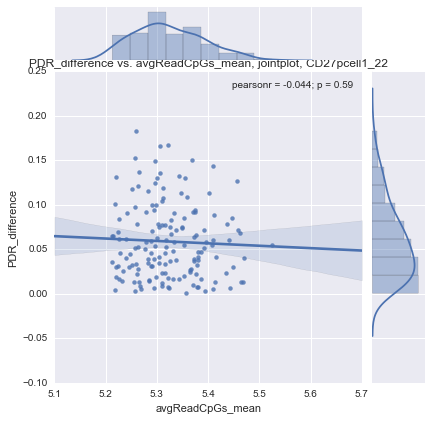

In [35]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs3, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, CD27pcell1_22")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


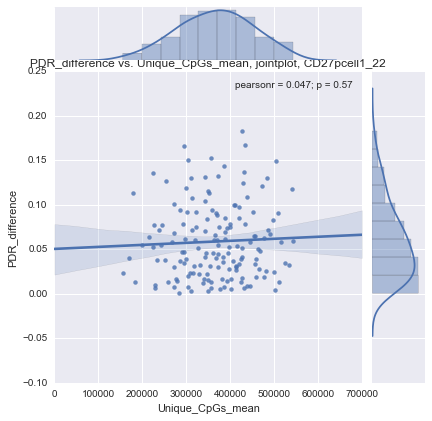

In [36]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs3, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, CD27pcell1_22")

In [37]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell23_44']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.PDR, pcell.PDR)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3a = pd.merge(out, pdr_differences, how='inner')
pairs3a = pairs3a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs3a.PDR_difference # dependent variable
X = pairs3a.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for Normal B 'NormalBCD19pCD27pcell22_34', predict \delta PDR")
est.summary()

Regression results for Normal B 'NormalBCD19pCD27pcell22_34', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.818
Date:                Fri, 08 Jul 2016   Prob (F-statistic):              0.145
Time:                        16:05:07   Log-Likelihood:                 510.68
No. Observations:                 231   AIC:                            -1013.
Df Residuals:                     227   BIC:                            -999.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const              -38.5653     44.404     -0.869      0.386      -126.062    48.931
avgReadCpGs_mean     0.0472      0.023      2.082      0.038         0.003     0.092
Unique_CpGs_mean  1.946e-08    2.7e-08      0.721      0.471     -3.37e-08  7.26e-08
bsRate_mean         38.4297     44.487      0.864      0.389       -49.231   126.090
==============================================================================
Omnibus:                       36.315   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.149
Skew:                           1.070   Prob(JB):                     3.50e-11
Kurtosis:                       3.654   Cond. No.                     1.28e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


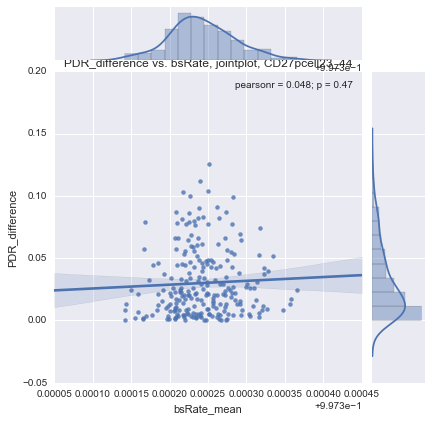

In [38]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs3a, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, CD27pcell23_44")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


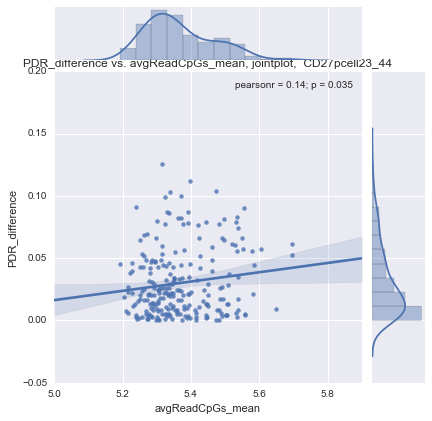

In [39]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs3a, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot,  CD27pcell23_44")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


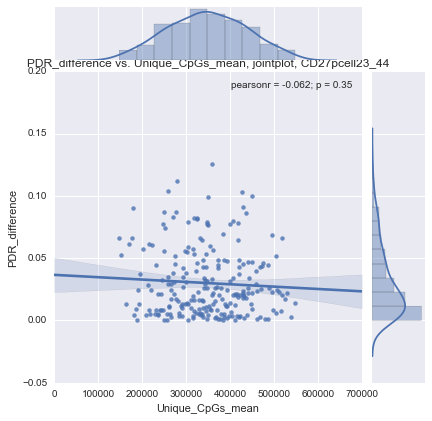

In [40]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs3a, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, CD27pcell23_44")

In [41]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell45_66']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.PDR, pcell.PDR)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3b = pd.merge(out, pdr_differences, how='inner')
pairs3b = pairs3b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs3b.PDR_difference # dependent variable
X = pairs3b.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for Normal B 'NormalBCD19pCD27pcell45_66', predict \delta PDR")
est.summary()

Regression results for Normal B 'NormalBCD19pCD27pcell45_66', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     2.760
Date:                Fri, 08 Jul 2016   Prob (F-statistic):             0.0582
Time:                        16:05:10   Log-Likelihood:                 76.464
No. Observations:                  36   AIC:                            -144.9
Df Residuals:                      32   BIC:                            -138.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const             -208.2096    218.856     -0.951      0.349      -654.005   237.586
avgReadCpGs_mean     0.1391      0.075      1.858      0.072        -0.013     0.292
Unique_CpGs_mean -1.583e-08    3.1e-08     -0.511      0.613      -7.9e-08  4.73e-08
bsRate_mean        208.0260    219.094      0.949      0.349      -238.253   654.305
==============================================================================
Omnibus:                        1.511   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.412
Skew:                           0.374   Prob(JB):                        0.494
Kurtosis:                       2.383   Cond. No.                     3.46e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


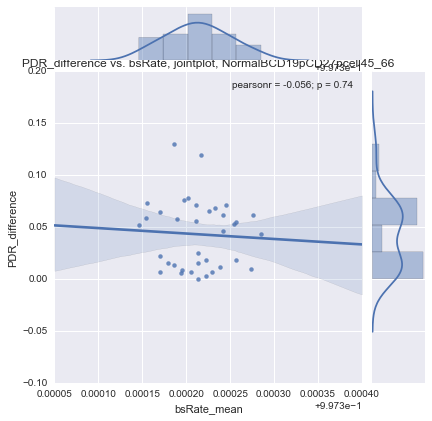

In [42]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs3b, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, NormalBCD19pCD27pcell45_66")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


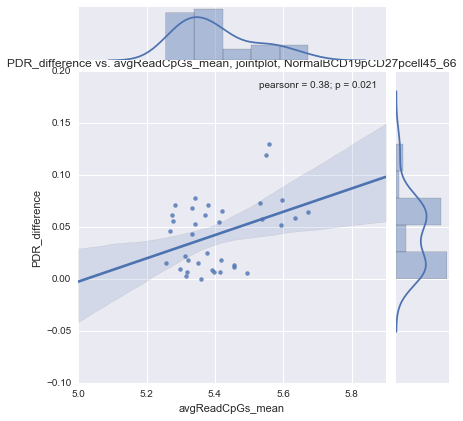

In [43]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs3b, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, NormalBCD19pCD27pcell45_66")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


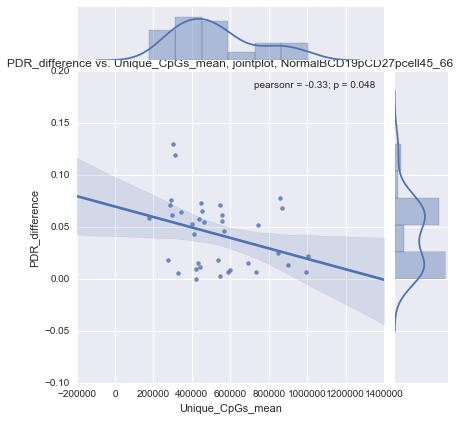

In [44]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs3b, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, NormalBCD19pCD27pcell45_66")

In [45]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell67_88']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.PDR, pcell.PDR)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3c = pd.merge(out, pdr_differences, how='inner')
pairs3c = pairs3c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs3c.PDR_difference # dependent variable
X = pairs3c.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for Normal B 'NormalBCD19pCD27pcell67_88', predict \delta PDR")
est.summary()

Regression results for Normal B 'NormalBCD19pCD27pcell67_88', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.944
Date:                Fri, 08 Jul 2016   Prob (F-statistic):              0.124
Time:                        16:05:13   Log-Likelihood:                 449.27
No. Observations:                 210   AIC:                            -890.5
Df Residuals:                     206   BIC:                            -877.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               11.9645     42.917      0.279      0.781       -72.649    96.578
avgReadCpGs_mean    -0.0782      0.045     -1.731      0.085        -0.167     0.011
Unique_CpGs_mean  2.979e-08   2.52e-08      1.182      0.238     -1.99e-08  7.95e-08
bsRate_mean        -11.5555     42.944     -0.269      0.788       -96.222    73.111
==============================================================================
Omnibus:                       11.646   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.653
Skew:                           0.595   Prob(JB):                      0.00179
Kurtosis:                       2.833   Cond. No.                     1.06e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


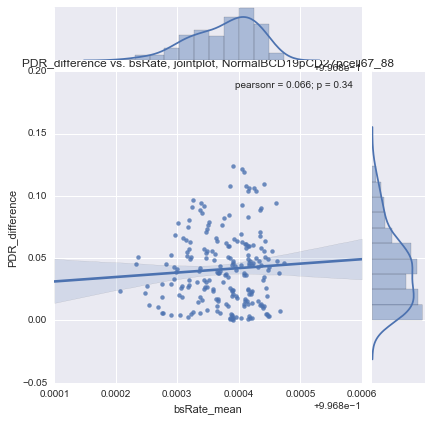

In [46]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs3c, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, NormalBCD19pCD27pcell67_88")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


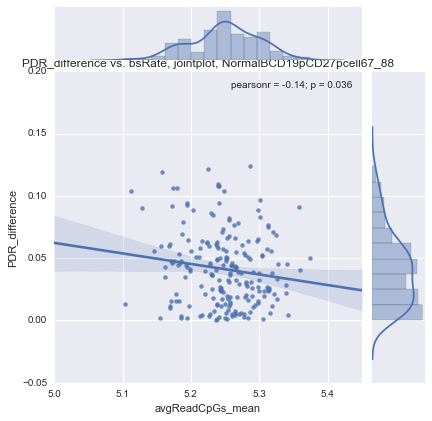

In [47]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs3c, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, NormalBCD19pCD27pcell67_88")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


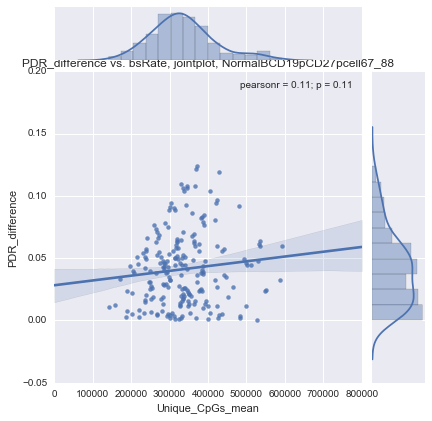

In [48]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs3c, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, NormalBCD19pCD27pcell67_88")

In [49]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell1_22_']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.PDR, mcell.PDR)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4 = pd.merge(out, pdr_differences, how='inner')
pairs4 = pairs4.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs4.PDR_difference # dependent variable
X = pairs4.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for 'NormalBCD19pCD27mcell1_22', predict \delta PDR")
est.summary()

Regression results for 'NormalBCD19pCD27mcell1_22', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     12.75
Date:                Fri, 08 Jul 2016   Prob (F-statistic):           1.84e-07
Time:                        16:05:15   Log-Likelihood:                 419.11
No. Observations:                 153   AIC:                            -830.2
Df Residuals:                     149   BIC:                            -818.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const              214.0898     37.670      5.683      0.000       139.653   288.527
avgReadCpGs_mean     0.0589      0.023      2.584      0.011         0.014     0.104
Unique_CpGs_mean -2.967e-08   2.13e-08     -1.393      0.166     -7.17e-08  1.24e-08
bsRate_mean       -214.9677     37.812     -5.685      0.000      -289.684  -140.251
==============================================================================
Omnibus:                       50.169   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.142
Skew:                           1.594   Prob(JB):                     1.62e-20
Kurtosis:                       5.034   Cond. No.                     1.65e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


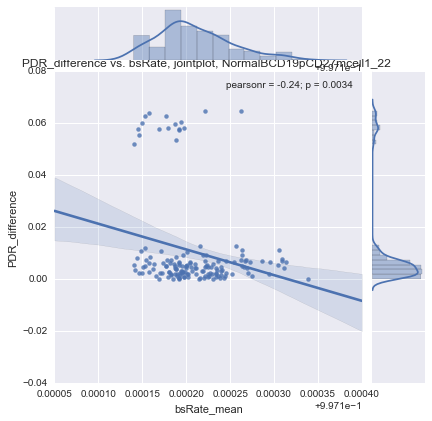

In [50]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs4, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, NormalBCD19pCD27mcell1_22 ")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


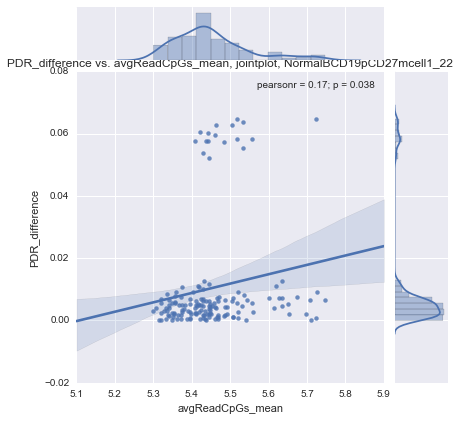

In [51]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs4, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, NormalBCD19pCD27mcell1_22")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


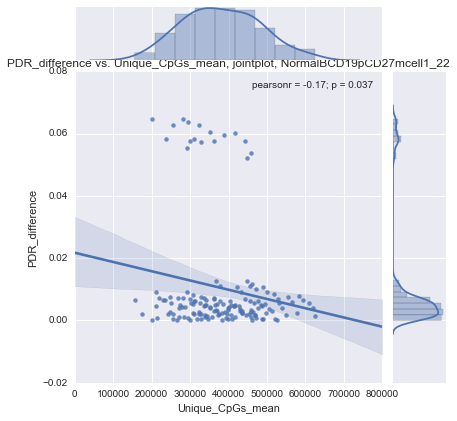

In [52]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs4, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, NormalBCD19pCD27mcell1_22")

In [53]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell23_44']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.PDR, mcell.PDR)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4a = pd.merge(out, pdr_differences, how='inner')
pairs4a = pairs4a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs4a.PDR_difference # dependent variable
X = pairs4a.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for 'NormalBCD19pCD27mcell23_44', predict \delta PDR")
est.summary()

Regression results for 'NormalBCD19pCD27mcell23_44', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     7.652
Date:                Fri, 08 Jul 2016   Prob (F-statistic):           8.00e-05
Time:                        16:05:19   Log-Likelihood:                 414.05
No. Observations:                 171   AIC:                            -820.1
Df Residuals:                     167   BIC:                            -807.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const              -22.6677     63.828     -0.355      0.723      -148.682   103.347
avgReadCpGs_mean    -0.0650      0.046     -1.424      0.156        -0.155     0.025
Unique_CpGs_mean  7.448e-08   3.01e-08      2.473      0.014       1.5e-08  1.34e-07
bsRate_mean         23.0609     63.990      0.360      0.719      -103.274   149.395
==============================================================================
Omnibus:                       81.382   Durbin-Watson:                   0.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.458
Skew:                           2.118   Prob(JB):                     6.02e-48
Kurtosis:                       6.547   Cond. No.                     1.91e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


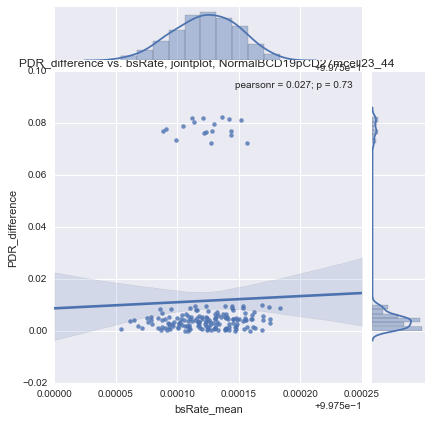

In [54]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs4a, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, NormalBCD19pCD27mcell23_44 ")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


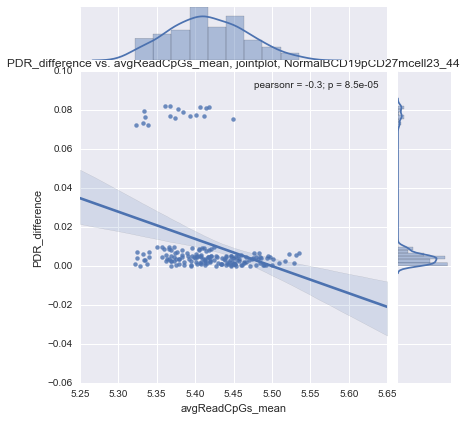

In [55]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs4a, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, NormalBCD19pCD27mcell23_44")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


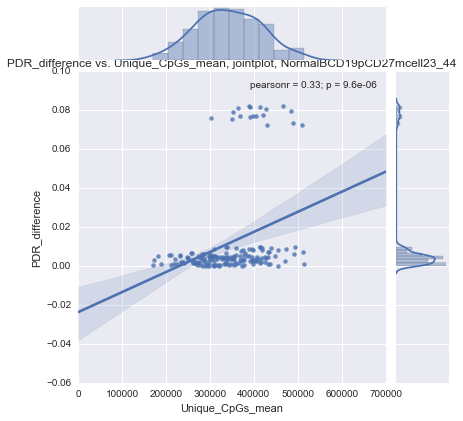

In [56]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs4a, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, NormalBCD19pCD27mcell23_44")

In [57]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell45_66']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.PDR, mcell.PDR)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4b = pd.merge(out, pdr_differences, how='inner')
pairs4b = pairs4b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs4b.PDR_difference # dependent variable
X = pairs4b.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for 'NormalBCD19pCD27mcell23_44', predict \delta PDR")
est.summary()

Regression results for 'NormalBCD19pCD27mcell23_44', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     6.070
Date:                Fri, 08 Jul 2016   Prob (F-statistic):           0.000667
Time:                        16:05:22   Log-Likelihood:                 603.73
No. Observations:                 136   AIC:                            -1199.
Df Residuals:                     132   BIC:                            -1188.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                9.0981      7.462      1.219      0.225        -5.663    23.859
avgReadCpGs_mean     0.0177      0.004      3.966      0.000         0.009     0.026
Unique_CpGs_mean  1.624e-08   4.77e-09      3.402      0.001       6.8e-09  2.57e-08
bsRate_mean         -9.2184      7.481     -1.232      0.220       -24.017     5.580
==============================================================================
Omnibus:                       15.593   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.224
Skew:                           0.829   Prob(JB):                     0.000182
Kurtosis:                       3.537   Cond. No.                     1.55e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


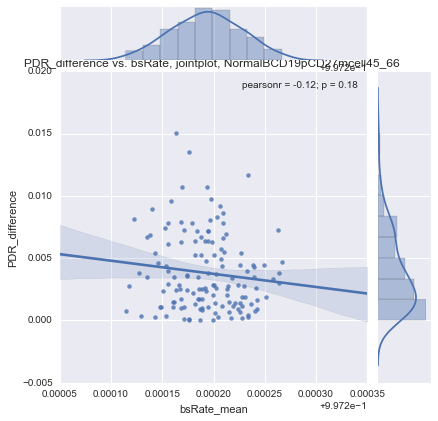

In [58]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs4b, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, NormalBCD19pCD27mcell45_66 ")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


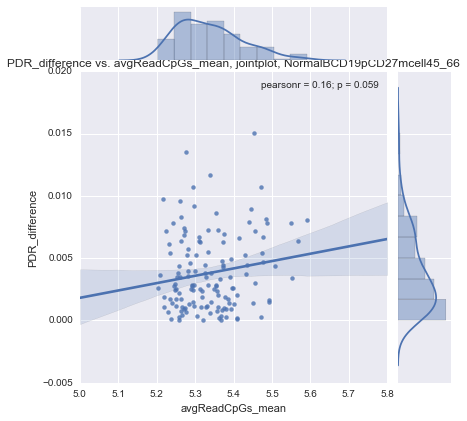

In [59]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs4b, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, NormalBCD19pCD27mcell45_66")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


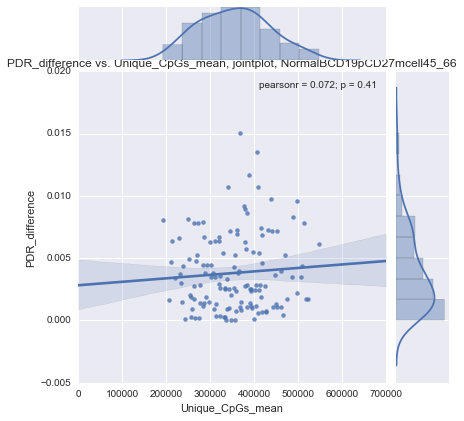

In [60]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs4b, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, NormalBCD19pCD27mcell45_66")

In [61]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell67_88']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.PDR, mcell.PDR)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4c = pd.merge(out, pdr_differences, how='inner')
pairs4c = pairs4c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs4c.PDR_difference # dependent variable
X = pairs4c.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for 'NormalBCD19pCD27mcell23_44', predict \delta PDR")
est.summary()

Regression results for 'NormalBCD19pCD27mcell23_44', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     7.763
Date:                Fri, 08 Jul 2016   Prob (F-statistic):           6.17e-05
Time:                        16:05:25   Log-Likelihood:                 569.91
No. Observations:                 210   AIC:                            -1132.
Df Residuals:                     206   BIC:                            -1118.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               50.6559     37.723      1.343      0.181       -23.717   125.029
avgReadCpGs_mean     0.0257      0.018      1.468      0.144        -0.009     0.060
Unique_CpGs_mean  6.067e-08   1.67e-08      3.631      0.000      2.77e-08  9.36e-08
bsRate_mean        -50.9406     37.824     -1.347      0.180      -125.513    23.632
==============================================================================
Omnibus:                       96.596   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.211
Skew:                           2.082   Prob(JB):                     2.86e-60
Kurtosis:                       6.742   Cond. No.                     2.04e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


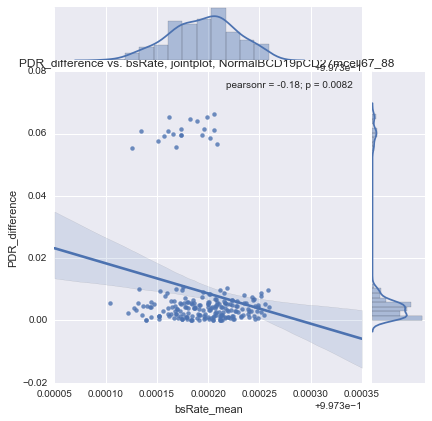

In [62]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs4c, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, NormalBCD19pCD27mcell67_88 ")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


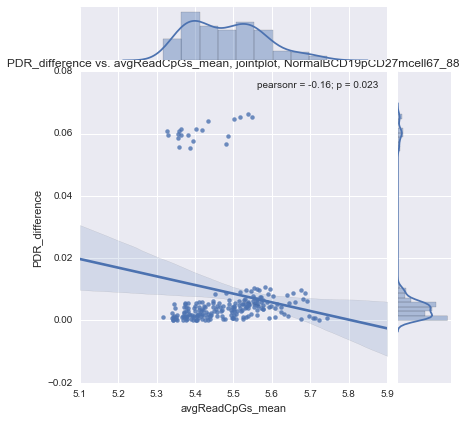

In [63]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs4c, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, NormalBCD19pCD27mcell67_88")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


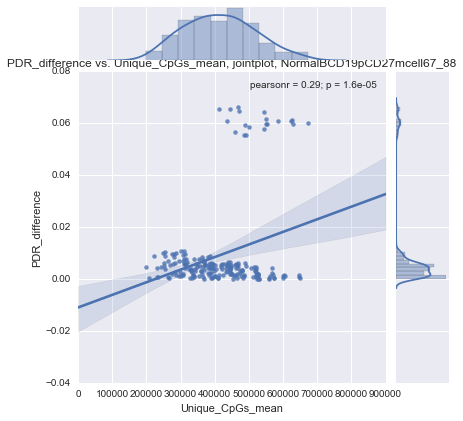

In [64]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs4c, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, NormalBCD19pCD27mcell67_88")

In [65]:
normb = merged[merged["protocol"] == 'normal_B_cell_A1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR, normb.PDR)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5 = pd.merge(out, pdr_differences, how='inner')
pairs5 = pairs5.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs5.PDR_difference # dependent variable
X = pairs5.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for 'normal_B_cell_A1_24', predict \delta PDR")
est.summary()

Regression results for 'normal_B_cell_A1_24', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.2577
Date:                Fri, 08 Jul 2016   Prob (F-statistic):              0.856
Time:                        16:05:28   Log-Likelihood:                 265.87
No. Observations:                 190   AIC:                            -523.7
Df Residuals:                     186   BIC:                            -510.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               -9.3400     16.075     -0.581      0.562       -41.053    22.373
avgReadCpGs_mean    -0.0341      0.085     -0.399      0.690        -0.202     0.134
Unique_CpGs_mean   7.15e-08   1.25e-07      0.573      0.567     -1.75e-07  3.18e-07
bsRate_mean         10.0033     16.813      0.595      0.553       -23.165    43.172
==============================================================================
Omnibus:                       66.531   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.180
Skew:                           0.299   Prob(JB):                      0.00137
Kurtosis:                       1.856   Cond. No.                     1.17e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


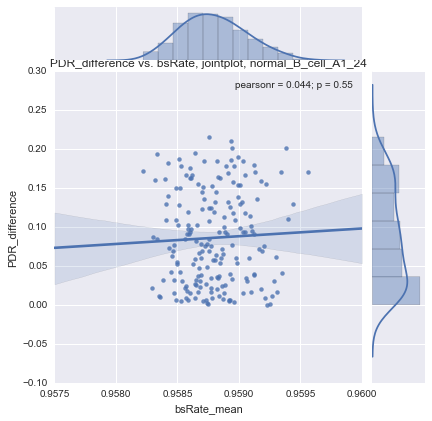

In [66]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs5, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, normal_B_cell_A1_24")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


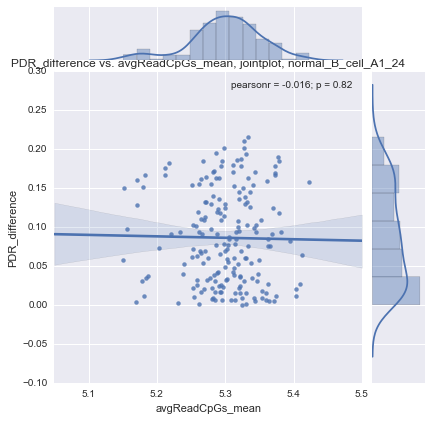

In [67]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs5, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, normal_B_cell_A1_24")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


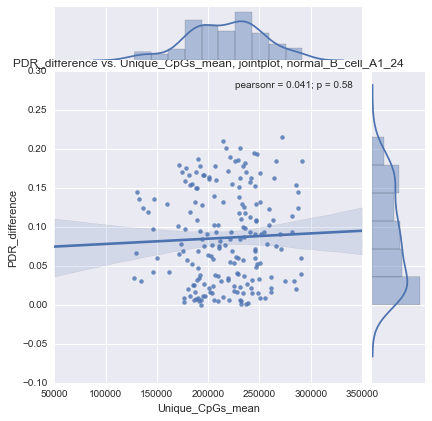

In [68]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs5, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, normal_B_cell_A1_24")

In [69]:
normb = merged[merged["protocol"] == 'normal_B_cell_B1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR, normb.PDR)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5a = pd.merge(out, pdr_differences, how='inner')
pairs5a = pairs5a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs5a.PDR_difference # dependent variable
X = pairs5a.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for 'normal_B_cell_B1_24', predict \delta PDR")
est.summary()

Regression results for 'normal_B_cell_B1_24', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.3304
Date:                Fri, 08 Jul 2016   Prob (F-statistic):              0.803
Time:                        16:05:32   Log-Likelihood:                 240.99
No. Observations:                 190   AIC:                            -474.0
Df Residuals:                     186   BIC:                            -461.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const              -32.0771     43.659     -0.735      0.463      -118.207    54.053
avgReadCpGs_mean    -0.0779      0.081     -0.962      0.337        -0.238     0.082
Unique_CpGs_mean -6.424e-09   4.57e-08     -0.141      0.888     -9.66e-08  8.37e-08
bsRate_mean         33.9108     45.716      0.742      0.459       -56.278   124.100
==============================================================================
Omnibus:                      657.703   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.626
Skew:                           0.099   Prob(JB):                     0.000245
Kurtosis:                       1.564   Cond. No.                     5.83e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


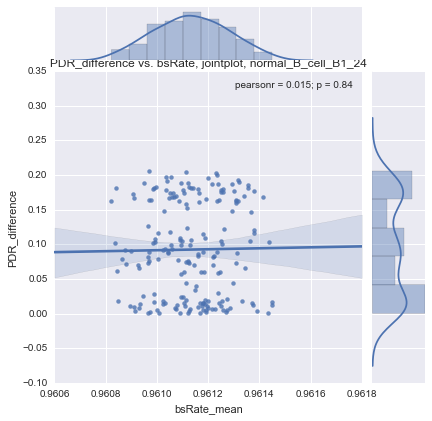

In [70]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs5a, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, normal_B_cell_B1_24")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


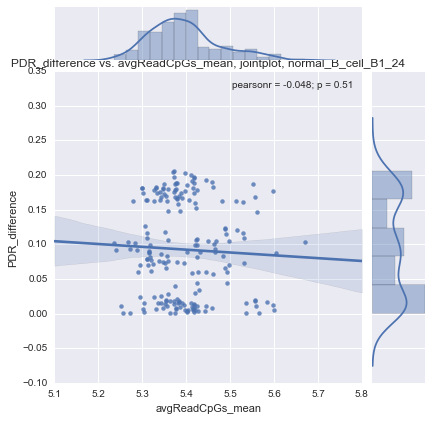

In [71]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs5a, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, normal_B_cell_B1_24")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


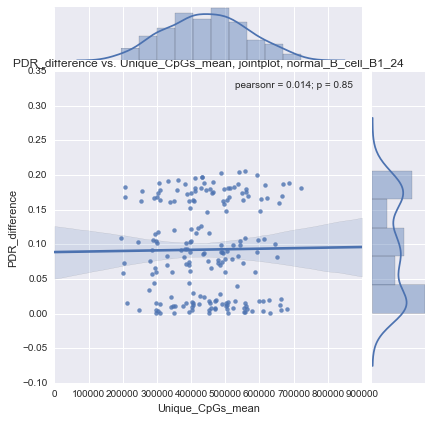

In [72]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs5a, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, normal_B_cell_B1_24")

In [73]:
normb = merged[merged["protocol"] == 'normal_B_cell_C1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR, normb.PDR)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5b = pd.merge(out, pdr_differences, how='inner')
pairs5b = pairs5b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs5b.PDR_difference # dependent variable
X = pairs5b.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for 'normal_B_cell_C1_24', predict \delta PDR")
est.summary()

Regression results for 'normal_B_cell_C1_24', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.3055
Date:                Fri, 08 Jul 2016   Prob (F-statistic):              0.821
Time:                        16:05:35   Log-Likelihood:                 321.30
No. Observations:                 231   AIC:                            -634.6
Df Residuals:                     227   BIC:                            -620.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               28.3954     33.024      0.860      0.391       -36.677    93.467
avgReadCpGs_mean     0.0196      0.090      0.217      0.828        -0.158     0.197
Unique_CpGs_mean  4.244e-09   1.98e-08      0.214      0.831     -3.48e-08  4.33e-08
bsRate_mean        -29.5285     34.613     -0.853      0.395       -97.732    38.675
==============================================================================
Omnibus:                      105.670   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.595
Skew:                           0.233   Prob(JB):                     0.000411
Kurtosis:                       1.815   Cond. No.                     9.25e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.25e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


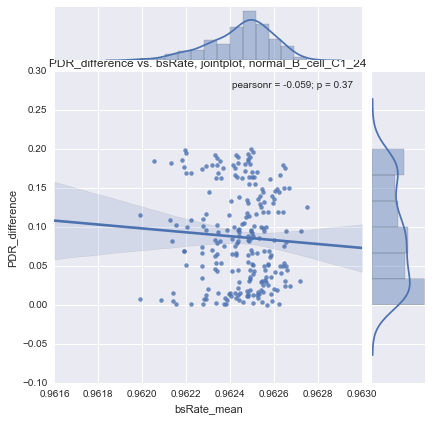

In [74]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs5b, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, normal_B_cell_C1_24")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


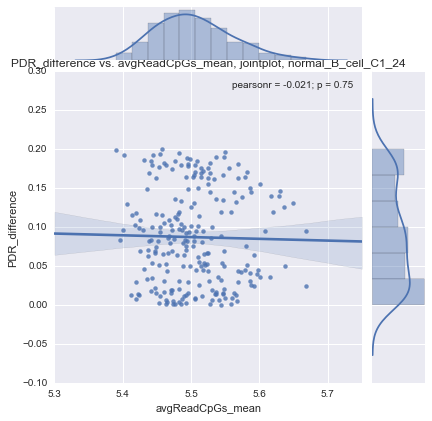

In [75]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs5b, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, normal_B_cell_C1_24")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


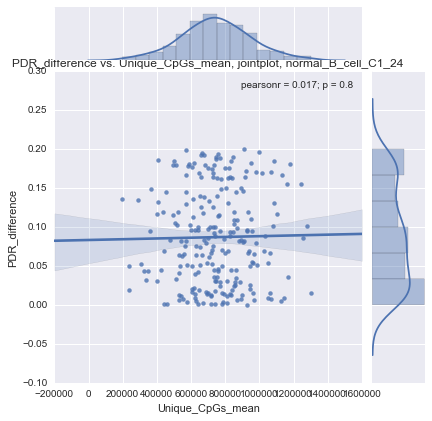

In [76]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs5b, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, normal_B_cell_C1_24")

In [77]:
normb = merged[merged["protocol"] == 'normal_B_cell_D1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR, normb.PDR)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5c = pd.merge(out, pdr_differences, how='inner')
pairs5c = pairs5c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs5c.PDR_difference # dependent variable
X = pairs5c.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for 'normal_B_cell_D1_24', predict \delta PDR")
est.summary()

Regression results for 'normal_B_cell_D1_24', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.5707
Date:                Fri, 08 Jul 2016   Prob (F-statistic):              0.638
Time:                        16:05:37   Log-Likelihood:                 57.162
No. Observations:                  36   AIC:                            -106.3
Df Residuals:                      32   BIC:                            -99.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const              -28.1188     59.801     -0.470      0.641      -149.930    93.693
avgReadCpGs_mean    -0.1341      0.129     -1.042      0.305        -0.396     0.128
Unique_CpGs_mean  6.644e-08      6e-08      1.108      0.276     -5.57e-08  1.89e-07
bsRate_mean         30.0337     62.279      0.482      0.633       -96.825   156.892
==============================================================================
Omnibus:                       13.704   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.866
Skew:                          -0.078   Prob(JB):                        0.239
Kurtosis:                       1.627   Cond. No.                     7.43e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.43e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


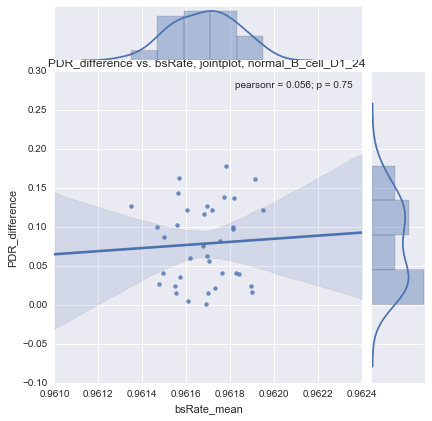

In [78]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs5c, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, normal_B_cell_D1_24 ")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


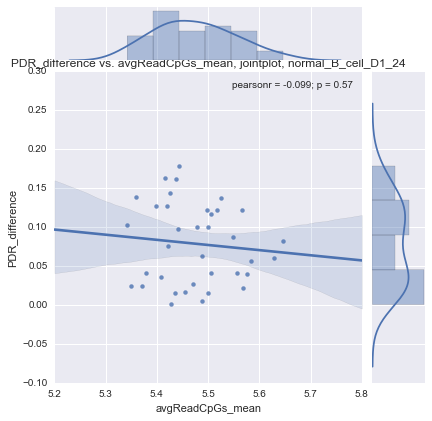

In [79]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs5c, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, normal_B_cell_D1_24")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


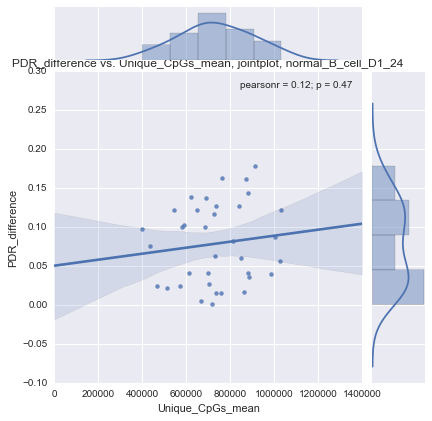

In [80]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs5c, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, normal_B_cell_D1_24")

In [81]:
normb = merged[merged["protocol"] == 'normal_B_cell_G1_22']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR, normb.PDR)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5d = pd.merge(out, pdr_differences, how='inner')
pairs5d = pairs5d.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs5d.PDR_difference # dependent variable
X = pairs5d.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for 'normal_B_cell_G1_22', predict \delta PDR")
est.summary()

Regression results for 'normal_B_cell_G1_22', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3.597
Date:                Fri, 08 Jul 2016   Prob (F-statistic):             0.0148
Time:                        16:05:40   Log-Likelihood:                 249.80
No. Observations:                 171   AIC:                            -491.6
Df Residuals:                     167   BIC:                            -479.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const              -39.0050     26.517     -1.471      0.143       -91.356    13.346
avgReadCpGs_mean     0.1447      0.097      1.486      0.139        -0.048     0.337
Unique_CpGs_mean -1.569e-08   4.09e-08     -0.384      0.701     -9.63e-08   6.5e-08
bsRate_mean         39.8947     27.921      1.429      0.155       -15.229    95.018
==============================================================================
Omnibus:                       55.378   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.278
Skew:                           0.332   Prob(JB):                      0.00216
Kurtosis:                       1.867   Cond. No.                     5.53e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


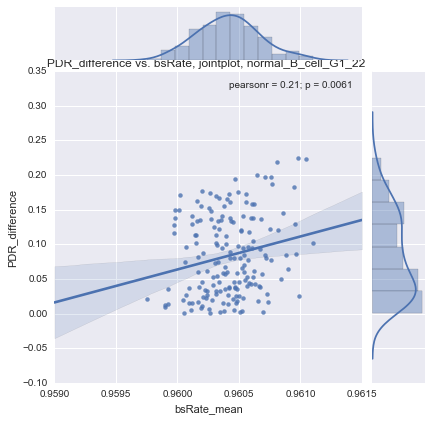

In [82]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs5d, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, normal_B_cell_G1_22 ")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


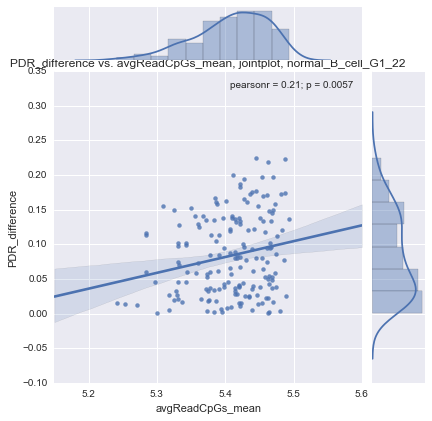

In [83]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs5d, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, normal_B_cell_G1_22")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


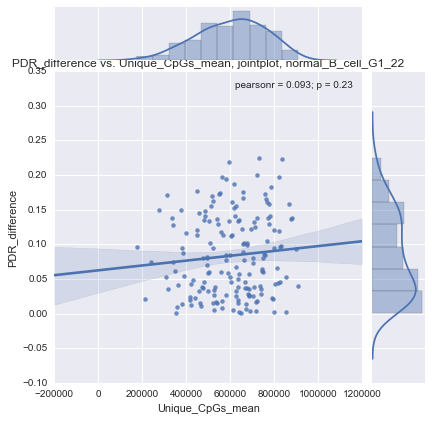

In [84]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs5d, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, normal_B_cell_G1_22")

In [85]:
normb = merged[merged["protocol"] == 'normal_B_cell_H1_22']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR, normb.PDR)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'PDR_difference': stacked})[['filename', 'PDR_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5e = pd.merge(out, pdr_differences, how='inner')
pairs5e = pairs5e.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
y = pairs5e.PDR_difference # dependent variable
X = pairs5e.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for 'normal_B_cell_H1_22', predict \delta PDR")
est.summary()

Regression results for 'normal_B_cell_H1_22', predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.035
Date:                Fri, 08 Jul 2016   Prob (F-statistic):              0.380
Time:                        16:05:43   Log-Likelihood:                 176.43
No. Observations:                 120   AIC:                            -344.9
Df Residuals:                     116   BIC:                            -333.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const              -24.7243     44.228     -0.559      0.577      -112.323    62.874
avgReadCpGs_mean    -0.1215      0.102     -1.194      0.235        -0.323     0.080
Unique_CpGs_mean  8.854e-08   6.02e-08      1.471      0.144     -3.07e-08  2.08e-07
bsRate_mean         26.4297     46.163      0.573      0.568       -65.003   117.862
==============================================================================
Omnibus:                       15.833   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.895
Skew:                           0.556   Prob(JB):                      0.00710
Kurtosis:                       2.139   Cond. No.                     6.56e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.56e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


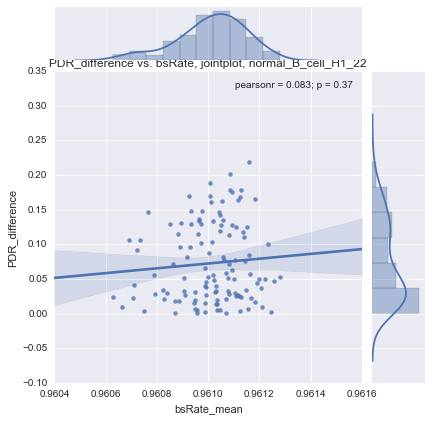

In [86]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=pairs5e, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, normal_B_cell_H1_22")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


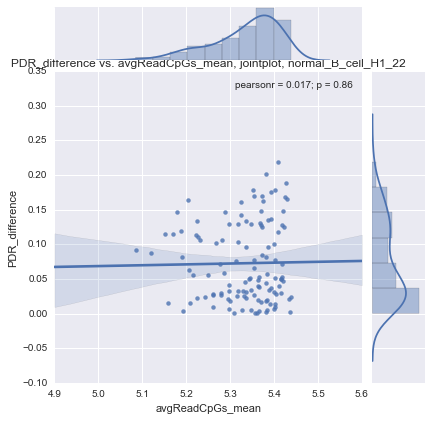

In [87]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=pairs5e, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, normal_B_cell_H1_22")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


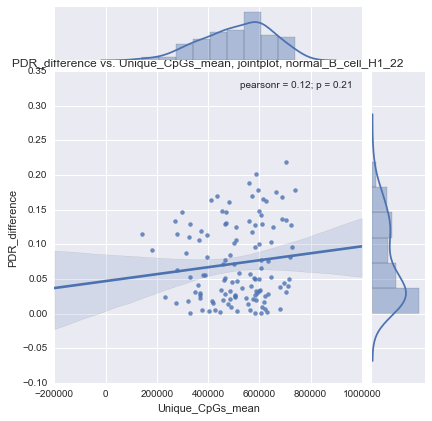

In [88]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=pairs5e, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, normal_B_cell_H1_22")

In [89]:
pairs['type'] = str('CLL')
pairs1a['type'] = str('CLL')
pairs2['type'] = str('CLL')
pairs2a['type'] = str('CLL')
pairs2b['type'] = str('CLL')
pairs3['type'] = str('CLL')
pairs3a['type'] = str('normal')
pairs3b['type'] = str('normal')
pairs3c['type'] = str('normal')
pairs4['type'] = str('normal')
pairs4a['type'] = str('normal')
pairs4b['type'] = str('normal')
pairs4c['type'] = str('normal')
pairs5['type'] = str('normal')
pairs5a['type'] = str('normal')
pairs5b['type'] = str('normal')
pairs5c['type'] = str('normal')
pairs5d['type'] = str('normal')
pairs5e['type'] = str('normal')

frames22 = [pairs, pairs2, pairs3, pairs4]
total_pairs = pd.concat(frames22)
y = total_pairs.PDR_difference # dependent variable
X = total_pairs.drop(['PDR', 'PDR_difference', 'total_reads_mean', 'filename'], axis=1)

categorical_variables = ['type']
for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)
    
X = X.drop(['type_normal'], axis=1)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results, all batches 'Normal B' vs 'CLL' , predict \delta PDR")
est.summary()

Regression results, all batches 'Normal B' vs 'CLL' , predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PDR_difference   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     166.5
Date:                Fri, 08 Jul 2016   Prob (F-statistic):          6.43e-101
Time:                        16:05:46   Log-Likelihood:                 1760.1
No. Observations:                 726   AIC:                            -3510.
Df Residuals:                     721   BIC:                            -3487.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               -1.1603      0.112    -10.343      0.000        -1.381    -0.940
avgReadCpGs_mean    -0.0203      0.010     -2.053      0.040        -0.040    -0.001
Unique_CpGs_mean -4.763e-08    3.5e-09    -13.593      0.000     -5.45e-08 -4.07e-08
bsRate_mean          1.3032      0.074     17.635      0.000         1.158     1.448
type_CLL             0.0426      0.003     16.017      0.000         0.037     0.048
==============================================================================
Omnibus:                      284.893   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1749.731
Skew:                           1.644   Prob(JB):                         0.00
Kurtosis:                       9.858   Cond. No.                     9.50e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


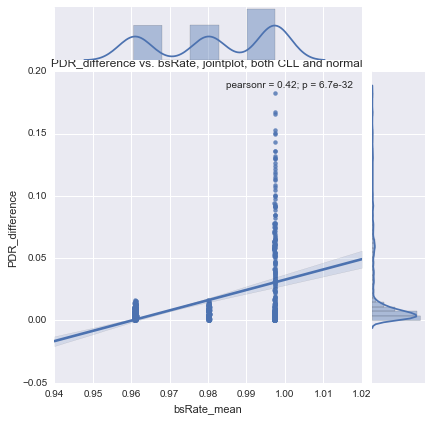

In [90]:
sns.jointplot(x="bsRate_mean", y="PDR_difference",  data=total_pairs, kind="reg")
plt.title("PDR_difference vs. bsRate, jointplot, both CLL and normal ")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


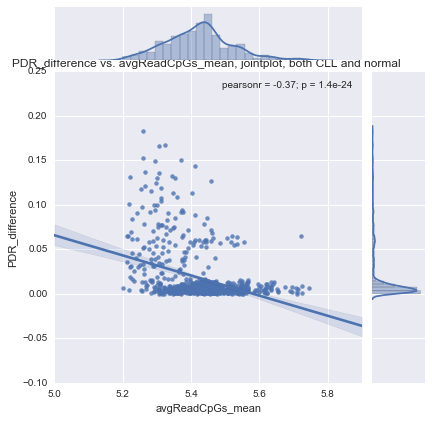

In [91]:
sns.jointplot(x="avgReadCpGs_mean", y="PDR_difference",  data=total_pairs, kind="reg")
plt.title("PDR_difference vs. avgReadCpGs_mean, jointplot, both CLL and normal ")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


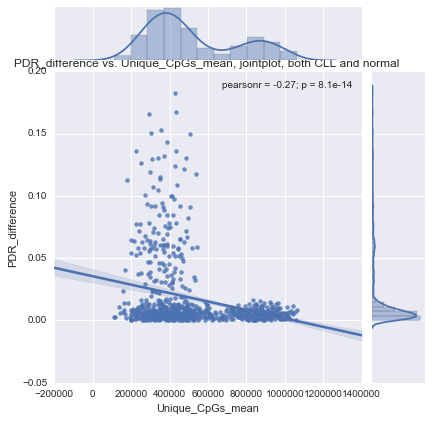

In [92]:
sns.jointplot(x="Unique_CpGs_mean", y="PDR_difference",  data=total_pairs, kind="reg")
plt.title("PDR_difference vs. Unique_CpGs_mean, jointplot, both CLL and normal ")

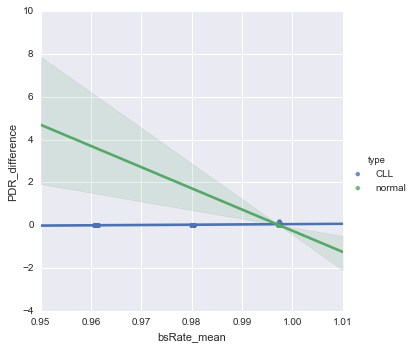

In [93]:
sns.lmplot(x="bsRate_mean", y="PDR_difference",  data=total_pairs, hue='type')

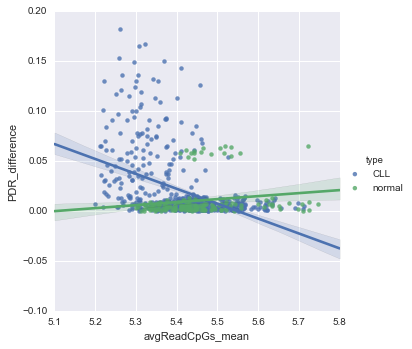

In [94]:
sns.lmplot(x="avgReadCpGs_mean", y="PDR_difference",  data=total_pairs, hue='type')

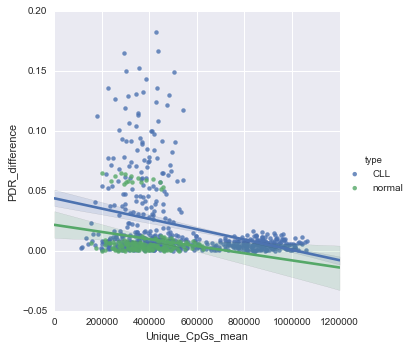

In [95]:
sns.lmplot(x="Unique_CpGs_mean", y="PDR_difference",  data=total_pairs, hue='type')

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


Random Forest model score is 0.902306825835


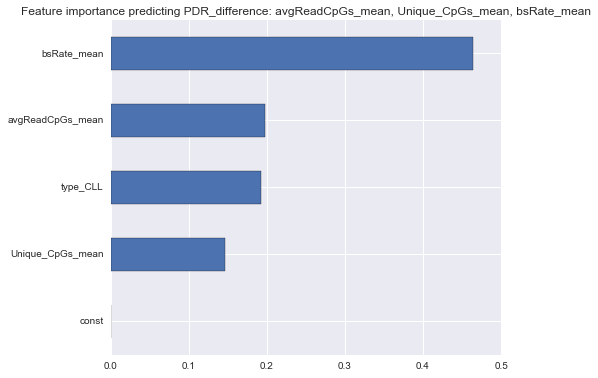

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

model = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=36)
model.fit(X, y)
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6))
plt.title("Feature importance predicting PDR_difference: avgReadCpGs_mean, Unique_CpGs_mean, bsRate_mean")
print(str("Random Forest model score is ") + str(model.score(X,y)))